# Unit 2: Supervised Learning Project
### Eduonix

A machine learning project using Python. This project is a supervised learning, classification problem with multiple classes.  In this project, we will compare and contrast the performance of three different learning models on a common and publicly available dataset.

This project depends on the following libraries.  Make sure you have them installed.

* scipy
* numpy
* matplotlib
* pandas
* scikit-learn

To double check that you have them installed, run the following code cell:

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.3
pandas: 2.2.1
sklearn: 1.4.1.post1


## 1. Import libraries

Import all of the modules, functions, and objects we will use in this tutorial.

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## 2. Load the Dataset

We will be using Gender Height Weight dataset, which contains 500 observations of both Male and Female details. 

In [8]:
# Load Dataset
url = "500_Person_Gender_Height_Weight_Index.csv"
names = ['Gender','Height','Weight','Index']
dataset = pandas.read_csv(url, names=names)

## 2.1 Dataset Properties

Lets take a look at the dataset by observing its dimensions, the first few rows of data, a statistical summary of the attributes, and a breakdown of the data by the class variable.

In [9]:
# Shape
print(dataset.shape)

(500, 4)


In [10]:
# Head
print(dataset.head(20))

    Gender  Height  Weight  Index
0     Male     174      96      4
1     Male     189      87      2
2   Female     185     110      4
3   Female     195     104      3
4     Male     149      61      3
5     Male     189     104      3
6     Male     147      92      5
7     Male     154     111      5
8     Male     174      90      3
9   Female     169     103      4
10    Male     195      81      2
11  Female     159      80      4
12  Female     192     101      3
13    Male     155      51      2
14    Male     191      79      2
15  Female     153     107      5
16  Female     157     110      5
17    Male     140     129      5
18    Male     144     145      5
19    Male     172     139      5


In [11]:
# descriptions
print(dataset.describe())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [13]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

In [14]:
dataset['Index'] = dataset['Index'].apply(give_names_to_indices)

In [23]:
dataset

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight
...,...,...,...,...
495,Female,150,153,Extremely Obese
496,Female,184,121,Obesity
497,Female,141,136,Extremely Obese
498,Male,150,95,Extremely Obese


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])


In [27]:
dataset

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,OverWeight
4,1,149,61,OverWeight
...,...,...,...,...
495,0,150,153,Extremely Obese
496,0,184,121,Obesity
497,0,141,136,Extremely Obese
498,1,150,95,Extremely Obese


In [28]:
# class distribution
print(dataset.groupby('Index').size())

Index
Extremely Obese    198
Extremely Weak      13
Normal              69
Obesity            130
OverWeight          68
Weak                22
dtype: int64


## 2.2 Data Visualizations

Lets visualize the data so we can understand the distribution of the input attributes. We will use histograms of each attribute, as well as some multivariate plots so that we can view the interactions between variables.

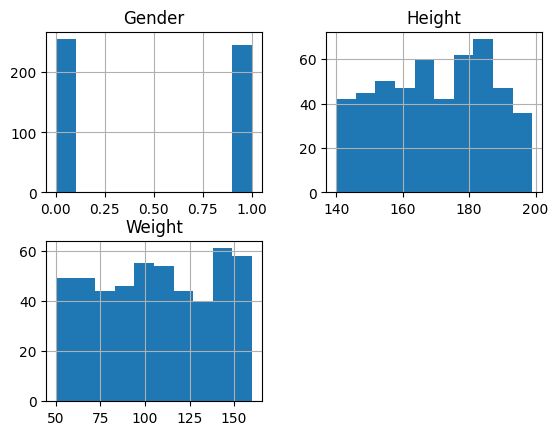

In [29]:
# histograms
dataset.hist()
plt.show()

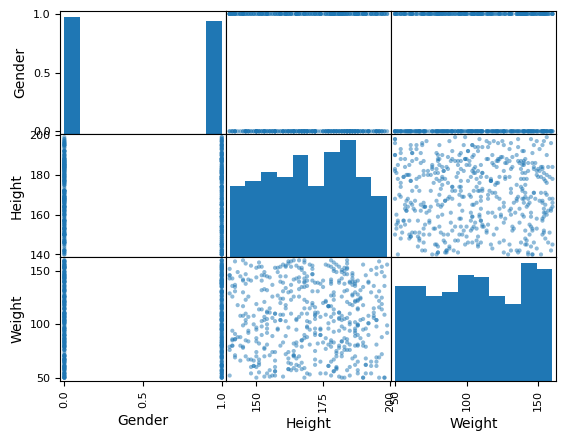

In [30]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

## 3. Evaluate Algorithms

Lets create some models of the data and estimate their accuracy on unseen data.

We are going to,

* Create a validation dataset
* Set-up cross validation
* Build three different models 
* Select the best model

## 3.1 Create Validation Dataset

Lets split the loaded dataset into two.  80% of the data will be used for training, while 20% will be used for validation.

In [34]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_scaled, Y, test_size = validation_size, random_state = seed)

## 3.2 10-fold Cross Validation

This will split our dataset into 10 parts, train on 9 and test on 1 and repeate for all combinations of train-test splits

In [37]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

## 3.3 Build Models

Lets evaluate three models:

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

In [42]:

models = []
models.append(('LR', LogisticRegression(class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.827500 (0.037832)
KNN: 0.832500 (0.070755)
SVM: 0.842500 (0.060260)


## 4. Make Predictions

Lets test the model on the validation set to make sure that our algorithms can generalize to new data.  Otherwise, we may be overfitting the training data.  

In [43]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

LR
0.82
                 precision    recall  f1-score   support

Extremely Obese       0.97      0.88      0.93        43
 Extremely Weak       0.33      1.00      0.50         2
         Normal       0.71      0.56      0.62         9
        Obesity       0.80      0.83      0.82        24
     OverWeight       0.65      0.85      0.73        13
           Weak       1.00      0.67      0.80         9

       accuracy                           0.82       100
      macro avg       0.74      0.80      0.73       100
   weighted avg       0.86      0.82      0.83       100

KNN
0.86
                 precision    recall  f1-score   support

Extremely Obese       0.95      0.86      0.90        43
 Extremely Weak       0.20      0.50      0.29         2
         Normal       1.00      0.89      0.94         9
        Obesity       0.79      0.92      0.85        24
     OverWeight       0.93      1.00      0.96        13
           Weak       0.83      0.56      0.67         9

       ac